In [93]:
import torch
import pickle
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import seaborn as sns
sns.set()
import CNN_WS as CNNrws

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

/Users/marcglettig/.local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CNN Weight sharing

Use a convolutional neural network with siamese architecture to use weight sharing

In [81]:
with open(f'data.p', 'rb') as f:
    train_input, train_target, train_classes,val_input,test_input,val_target,test_target,val_classes,test_classes = pickle.load(f)

In [84]:
torch.manual_seed(42)
losses, losses_val, accuracies_train, accuracies_test, accuracies_val, all_classified, misclassified  = (
    CNNrws.train_all(train_input, train_target, train_classes,val_input, val_target, val_classes, test_input, 
                 test_target, test_classes,nb_epochs=100))

--------------------------------------------------  
 Iteration 0 
 
Training accuracy is 0.98 
Validation accuracy is 0.836 
--------------------------------------------------  
 Iteration 1 
 
Training accuracy is 0.974 
Validation accuracy is 0.858 
--------------------------------------------------  
 Iteration 2 
 
Training accuracy is 0.968 
Validation accuracy is 0.828 
--------------------------------------------------  
 Iteration 3 
 
Training accuracy is 0.958 
Validation accuracy is 0.834 
--------------------------------------------------  
 Iteration 4 
 
Training accuracy is 0.969 
Validation accuracy is 0.842 
--------------------------------------------------  
 Iteration 5 
 
Training accuracy is 0.968 
Validation accuracy is 0.838 
--------------------------------------------------  
 Iteration 6 
 
Training accuracy is 0.963 
Validation accuracy is 0.844 
--------------------------------------------------  
 Iteration 7 
 
Training accuracy is 0.96 
Validation accur

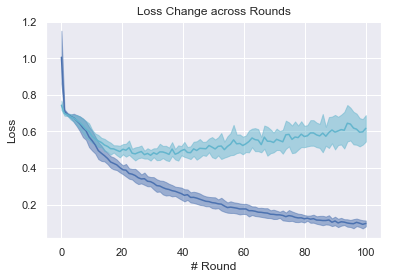

In [95]:
mini_batch_size = 100
plt.figure()
plotloss((losses/(train_input.size(0)/mini_batch_size)).T,color= 'b')
plotloss(losses_val.T,color= 'c')

plt.show()

### Evaluation of model performance

In [86]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9659 ± 0.0000 


In [87]:
accs_val = torch.Tensor(accuracies_val)
print(f"The test accuracy of the model is {accs_val.mean():.4f} ± {accs_val.var():.4f} ")

The test accuracy of the model is 0.8391 ± 0.0002 


In [88]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.8496 ± 0.0001 


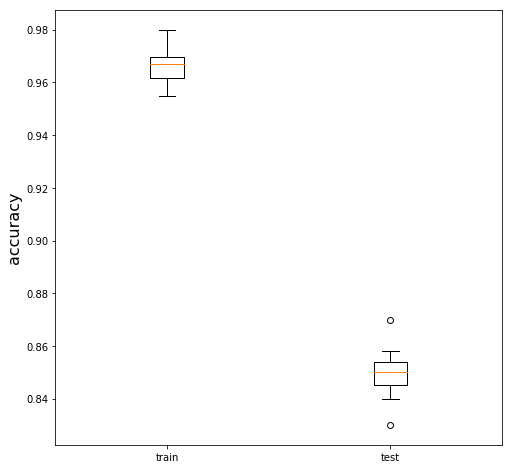

In [89]:
plot_performance(accuracies_train,accuracies_test)

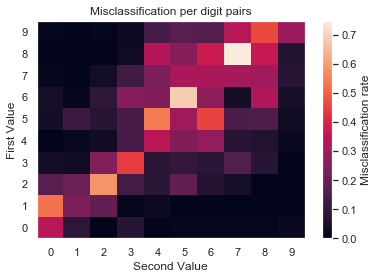

In [94]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
heat_map = plot_heatmap(misclassified,all_classified)

In [91]:
import pickle
with open(f'produced/CNN_WS_accuracy.p', 'wb') as f:
    pickle.dump(accuracies_test ,f)

In [92]:
with open(f'produced/CNN_WS_heatmap.p', 'wb') as f:
    pickle.dump(heat_map ,f)